# Missing Values - Feature Engineering


Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
Feature Engineering---Handling Missing Values
Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information
Survey informations are not that valid
Men--salary
Women---age
People may have died----NAN
Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?

- Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Missing Data not at Random(MNAR)

##### Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [7]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
## Find the percentage of null values

df['cabin_null'].mean()

0.7710437710437711

In [8]:
df['Age'].mean()


29.69911764705882

In [9]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Missing at the Random (MAR)

Men-- hide their salary
Women---hide their age

### All the techniques of handling missing values

1. Mean/Median/Mode replacement
2. Random sample imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary Imputation
6. Frequent categoriies Imputation

#### Mean/Median/Mode imputation
when should be apply?
Mean/Median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables.

In [10]:
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv')
new_df = df[['Age','Fare','Survived']]

In [11]:
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv',usecols=['Age','Fare','Survived'])

In [12]:
new_df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
### Lets go and see the percentage of missing values
df['Age'].isnull().mean()

0.19865319865319866

In [15]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)


In [17]:
median =df.Age.median()

In [18]:
median

28.0

In [19]:
impute_nan(df,'Age',median)

In [20]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [21]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

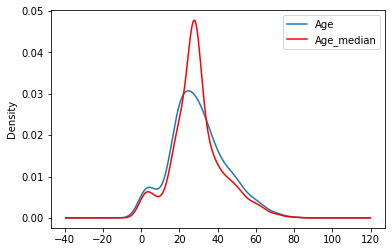

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax=ax)
df.Age_median.plot(kind = 'kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

### Advantages and Disadvantages os Mean / Median Imputation

### Advantages
1. Easy to implement ( Robust to outliers).
2. Faster way to obtain the complete dataset.

### Disadvantages
1. Change or Distortion in the original variance
2. Impact correlation - once we change the value with the median

## Random sample imputation

Aim : Random Sample imputation consists of taking random observation from the data set and we use this observation to replace the NAN values

When should it be used?
It assumes that the data are missing completely at random(MCAR)

In [24]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [33]:
df['Age'].isnull().sum()

177

In [31]:
df['Age'].dropna().sample()

635    28.0
Name: Age, dtype: float64

In [45]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [46]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ## It will have the random sample to fill NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas needs to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [48]:
impute_nan(df,"Age",median)

In [49]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

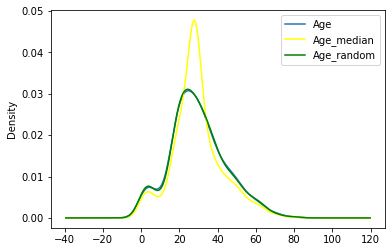

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax=ax)
df.Age_median.plot(kind = 'kde', ax=ax, color='yellow')
df.Age_random.plot(kind = 'kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

## Advantages

1. Easy to implement
2. Less Distortion in variance

### Disadvantages

1. Every situation randomness wont work

### Capturing NAN values with a new feature

It works well if the data are not missing completly at random(MNAR).There is absolutely some relationship between the data missing and any other values, observed or missing with in the dataset.

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
import numpy as np
df['Age_Nan']=np.where(df['Age'].isnull(),1,0)

In [5]:
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [9]:
df.Age.mean()

29.69911764705882

In [10]:
# Replace a age with media
df.Age.median()


28.0

In [14]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [17]:
df.head(10)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance missing value.Where ever NAN value replace with 1 else 0.

### Disadvantages

1. Creating Additional Features ( eg - 10 coulmns having missing value will create 10 columns having 0 and 1). It may lead to Curse of Dimentionality

#### End of Distribution imputation

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

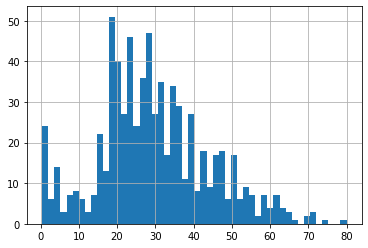

In [2]:
df.Age.hist(bins=50)

In [3]:
df.Age.mean()

29.69911764705882

In [6]:
# we need to take values after 3 sigma

extreme = df.Age.mean()+3*df.Age.std()

C:\Users\axagrawal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

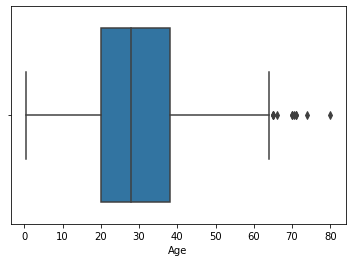

In [7]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [13]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [14]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [15]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot:>

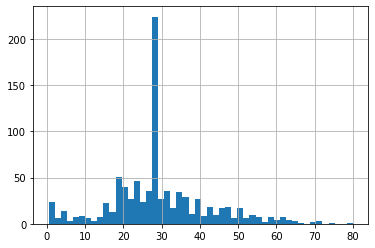

In [17]:
df['Age'].hist(bins=50)

<AxesSubplot:>

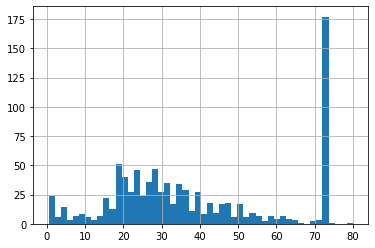

In [22]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\axagrawal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

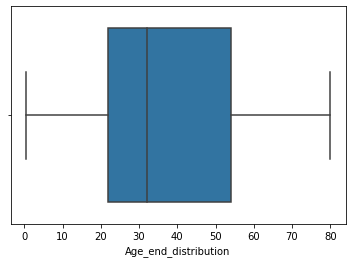

In [20]:
sns.boxplot('Age_end_distribution',data = df)

# Advantages 

1. Easy to implement
2. Capture the importance of missingness if there is one.

### Disadvantages

1. Distorts the original distribution of the variable.
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution.
3. If the number of NA is big, it will mask the true outliers in the distribution.
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step of 
   feature engineering

### Arbitrary value Imputation

This technique was derived from kaggle competition. It will take last outlier of any features.

It consists of replacing NAN by an arbitrary value


In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
def impute_nan(df,variable):
    df[variable+"_hundered"] = df[variable].fillna(100)
    df[variable+"_Zero"] = df[variable].fillna(0)

<AxesSubplot:>

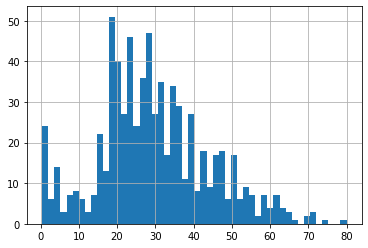

In [6]:
df["Age"].hist(bins=50)

### Arbitrary values
#### It should not be more frequently present. I might take the last outlier value or the first outlier value

### Advantages 
- Easy to implement
- Capture the importance of missingness if there is one.

### Disadvantages
- Distorts the original distribution of the variable
- if the missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

